In [1]:
import pandas as pd
import numpy as np

In [14]:
top_performers_for_anova = {'result.r2_dbdb_healthy': {'extra_mouse_chem.h5ad': np.array([0.99455716, 0.99429556, 0.99526207]),
  'train_adata_baseline_top3000hvg.h5ad': np.array([0.99361177, 0.99383294, 0.99234884, 0.99251673, 0.99331499,
         0.99361177, 0.99383294, 0.99234884]),
  'extra_mouse_T1D.h5ad': np.array([0.99492497, 0.99438503, 0.99360362]),
  'extra_mouse_young.h5ad': np.array([0.99491306, 0.99212912, 0.99319578]),
  'extra_mouse_Embryonic.h5ad': np.array([0.98853318])},
 'result.r2_dbdb_OOD': {'extra_mouse_chem.h5ad': np.array([0.86194461]),
  'train_adata_baseline_top3000hvg.h5ad': np.array([0.79873185, 0.79931434]),
  'extra_mouse_T1D.h5ad': np.array([0.85437402]),
  'extra_mouse_young.h5ad': np.array([0.79655277]),
  'extra_mouse_Embryonic.h5ad': np.array([0.8228805])},
 'result.r2_mSTZ_healthy': {'extra_mouse_chem.h5ad': np.array([0.97355678]),
  'train_adata_baseline_top3000hvg.h5ad': np.array([0.98974275, 0.98974275]),
  'extra_mouse_T1D.h5ad': np.array([0.972287]),
  'extra_mouse_young.h5ad': np.array([0.98462793]),
  'extra_mouse_Embryonic.h5ad': np.array([0.98140811])},
 'result.r2_mSTZ_OOD': {'extra_mouse_chem.h5ad': np.array([0.8680649 , 0.94848754, 0.90506495]),
  'train_adata_baseline_top3000hvg.h5ad': np.array([0.91252919]),
  'extra_mouse_T1D.h5ad': np.array([0.88246886]),
  'extra_mouse_young.h5ad': np.array([0.92517102]),
  'extra_mouse_Embryonic.h5ad': np.array([0.90930227])}}

In [15]:
# Step 2: Running ANOVA for each test dataset
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for column, performances in top_performers_for_anova.items():
    try:
        df_for_anova = pd.DataFrame([(k, v) for k, values in performances.items() for v in values], columns=["dataset_train", column])

        new_column_name = column.replace(".", "_")
        df_for_anova = df_for_anova.rename(columns={column: new_column_name})

        formula = f"{new_column_name} ~ C(dataset_train)"
        model = ols(formula, data=df_for_anova).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        
        print(f"ANOVA results for {new_column_name}:\n\n", anova_table)
        
        # Tukey HSD
        tukey_results = pairwise_tukeyhsd(df_for_anova[new_column_name], df_for_anova['dataset_train'])
        print("\nTukey HSD results:\n", tukey_results)
        
    except:
        print(f"Anova or Tukey HSD can't be performed for {new_column_name}\n\n")
        print("----------------------------------------------------------------------")


ANOVA results for result_r2_dbdb_healthy:

                     sum_sq    df          F    PR(>F)
C(dataset_train)  0.000032   4.0  12.253505  0.000238
Residual          0.000008  13.0        NaN       NaN

Tukey HSD results:
                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
          group1                          group2                meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------------
extra_mouse_Embryonic.h5ad                 extra_mouse_T1D.h5ad   0.0058 0.0003  0.0028 0.0087   True
extra_mouse_Embryonic.h5ad                extra_mouse_chem.h5ad   0.0062 0.0001  0.0033 0.0091   True
extra_mouse_Embryonic.h5ad               extra_mouse_young.h5ad   0.0049 0.0012   0.002 0.0078   True
extra_mouse_Embryonic.h5ad train_adata_baseline_top3000hvg.h5ad   0.0046 0.0009   0.002 0.0073   True
      extra_mouse_T1D.h5ad                extra_mouse_chem.

/d/hpc/home/mo6643/miniconda3/envs/anova/lib/python3.10/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic



Tukey HSD results:
                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
          group1                          group2                meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------------------------------------
extra_mouse_Embryonic.h5ad                 extra_mouse_T1D.h5ad  -0.0091   0.0 -0.0091 -0.0091   True
extra_mouse_Embryonic.h5ad                extra_mouse_chem.h5ad  -0.0079   0.0 -0.0079 -0.0079   True
extra_mouse_Embryonic.h5ad               extra_mouse_young.h5ad   0.0032   0.0  0.0032  0.0032   True
extra_mouse_Embryonic.h5ad train_adata_baseline_top3000hvg.h5ad   0.0083   0.0  0.0083  0.0083   True
      extra_mouse_T1D.h5ad                extra_mouse_chem.h5ad   0.0013   0.0  0.0013  0.0013   True
      extra_mouse_T1D.h5ad               extra_mouse_young.h5ad   0.0123   0.0  0.0123  0.0123   True
      extra_mouse_T1D.h5ad train_adata_baseline_top3000hvg.h5

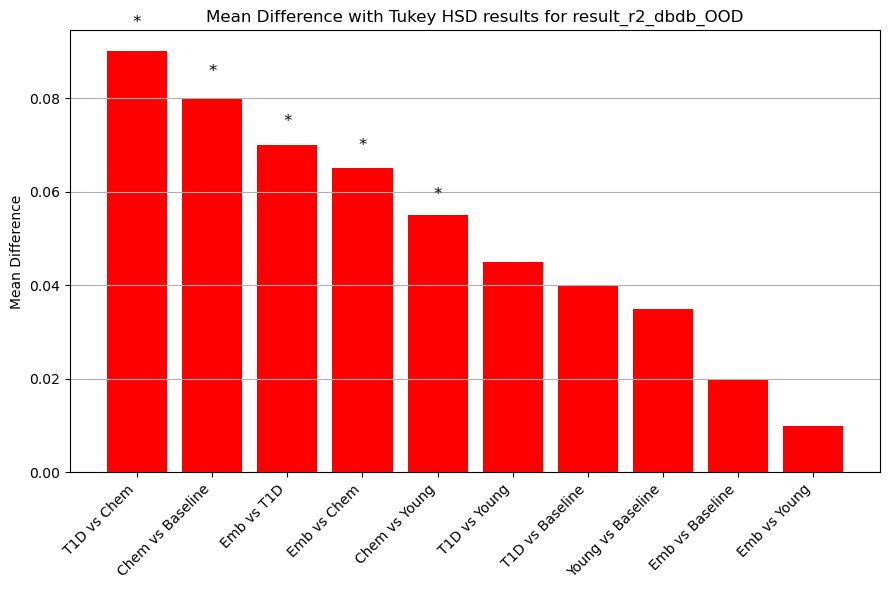

In [13]:
import matplotlib.pyplot as plt

# Sample data
differences = {
    "Emb vs T1D": 0.07,
    "Emb vs Chem": 0.065,
    "Emb vs Young": 0.01,
    "Emb vs Baseline": 0.02,
    "T1D vs Chem": 0.09,
    "T1D vs Young": 0.045,
    "T1D vs Baseline": 0.04,
    "Chem vs Young": 0.055,
    "Chem vs Baseline": 0.08,
    "Young vs Baseline": 0.035
}

# Sort by absolute value in descending order
sorted_comparisons = sorted(differences.keys(), key=lambda x: -abs(differences[x]))

# Get the sorted values
sorted_values = [differences[key] for key in sorted_comparisons]

# Plot
plt.figure(figsize=(9, 6))
bar_colors = ['red' if val > 0 else 'blue' for val in sorted_values]
bars = plt.bar(sorted_comparisons, sorted_values, color=bar_colors)

# Annotate bars with asterisks if needed (let's assume differences > 0.05 are significant)
for idx, rect in enumerate(bars):
    height = rect.get_height()
    if abs(height) > 0.05:
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, '*',
                 ha='center', va='bottom', color='black', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Mean Difference')
plt.title('Mean Difference with Tukey HSD results for result_r2_dbdb_OOD')
plt.tight_layout()  # Adjust layout for better display
plt.grid(axis='y')  # Add a y-axis grid for better readability
plt.show()
